In [33]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mlxtend.plotting import plot_decision_regions
from sklearn import metrics
import itertools
from concurrent.futures import ProcessPoolExecutor
from tqdm.auto import tqdm
import numpy as np

In [2]:
sub_df = pd.read_csv('/home/tobamo/analize/project-tobamo/analysis/fragmented_orf/results/combined_testB_data_subset.csv')

In [3]:
sub_df = sub_df.sample(frac=1, random_state=42)

In [4]:
def train_and_evaluate(params):
    kernel, C, X_train, X_test, y_train, y_test = params
    # Make a copy of the data to avoid issues with writeable flag
    X_train_copy = X_train.copy()
    X_test_copy = X_test.copy()
    y_train_copy = y_train.copy()
    y_test_copy = y_test.copy()
    
    model = SVC(kernel=kernel, C=C)
    model.fit(X_train_copy, y_train_copy)
    score = model.score(X_test_copy, y_test_copy)
    return {'kernel': kernel, 'C': C, 'score': score}

In [82]:
# Prepare the data (assuming sub_df is already defined)
data = sub_df
X = data[['identity_score', 'gap_ratio', 'N/aln_len', 'M', 'N', 'aln_len', 'orf_len', 'ref_len', 'gap_openings', 'aln_orf_len', 'len']]
y = (data['pair_type'] == 'tobamo-tobamo').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameters to test
kernels = ['linear', 'poly', 'rbf']
C_values = [0.01, 0.1, 1.0, 10.0, 50.0, 100.0]

# Create parameter combinations
param_combinations = list(itertools.product(kernels, C_values))
params = [(kernel, C, X_train, X_test, y_train, y_test) for kernel, C in param_combinations]

In [6]:
# Use ProcessPoolExecutor for parallelization
with ProcessPoolExecutor(max_workers=36) as executor:
    results = list(tqdm(executor.map(train_and_evaluate, params), total=len(params)))

  0%|          | 0/18 [00:00<?, ?it/s]

In [7]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by='score', ascending=False)

,kernel,C,score
17,rbf,100.00,0.977481
16,rbf,50.00,0.977082
15,rbf,10.00,0.975752
11,poly,100.00,0.975575
10,poly,50.00,0.975132
9,poly,10.00,0.974955
14,rbf,1.00,0.974644
8,poly,1.00,0.973758
13,rbf,0.10,0.972118
5,linear,100.00,0.971453


In [8]:
scores = results_df.values.reshape(len(kernels), len(C_values), 3)

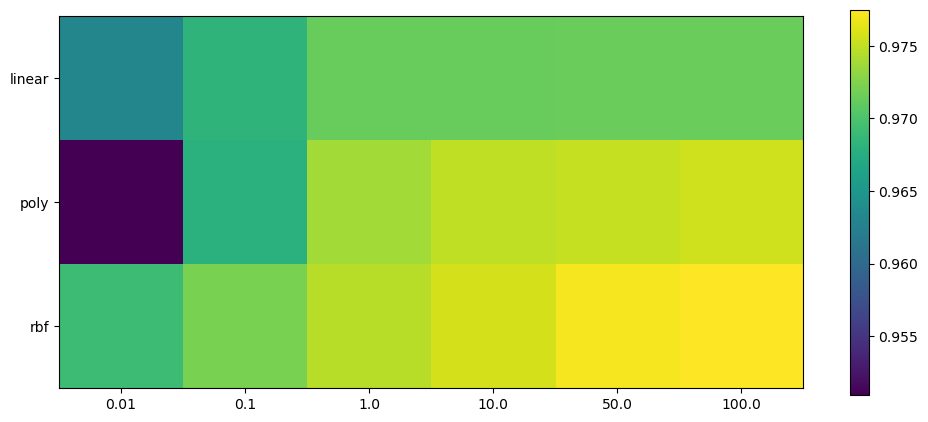

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,5))

plt.imshow(scores[..., -1].astype(float))
plt.xticks(range(len(C_values)), C_values)
plt.yticks(range(len(kernels)), kernels)
plt.colorbar();

Plot classification boundaries

In [83]:
mod = SVC(C=50.0, kernel='rbf')
mod.fit(X_train, y_train)

SVC(C=50.0)

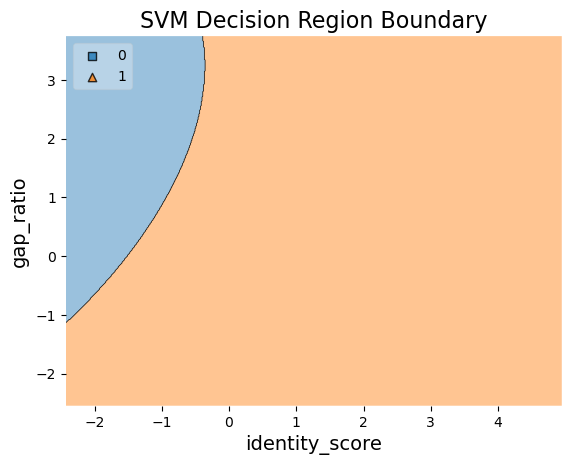

In [107]:
mean_values = [X_train[col].mean() for col in range(0,12)]
std_values = [X_train[col].std() for col in range(0,12)]
filler_values = [mean + 1 * std for mean, std in zip(mean_values, std_values)]
width = 0.75

# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=X_test, 
                      y=y_test.values,
                      clf=mod,
                      feature_index=[0,1],
                      filler_feature_values={col: filler_values[col] for col in range(2, 11)},
                      filler_feature_ranges={col: width for col in range(2, 11)},
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()

identity_score, gap_ratio

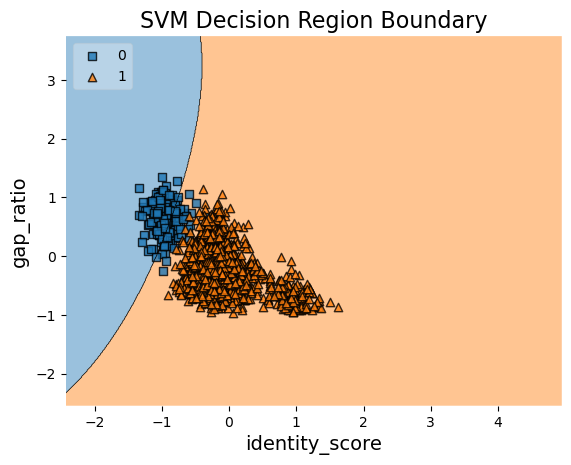

In [92]:
value = np.mean(X_test[:,0])
width = 0.75

# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=X_test, 
                      y=y_test.values,
                      clf=mod,
                      feature_index=[0,1],
                      filler_feature_values={2: value, 3:value, 4:value, 5: value, 6:value, 7:value, 8:value, 9:value, 10:value},
                      filler_feature_ranges={2: width, 3:width, 4:width, 5: width, 6:width, 7:width, 8:width, 9:width, 10:width},
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()

identity_score, N/aln_len

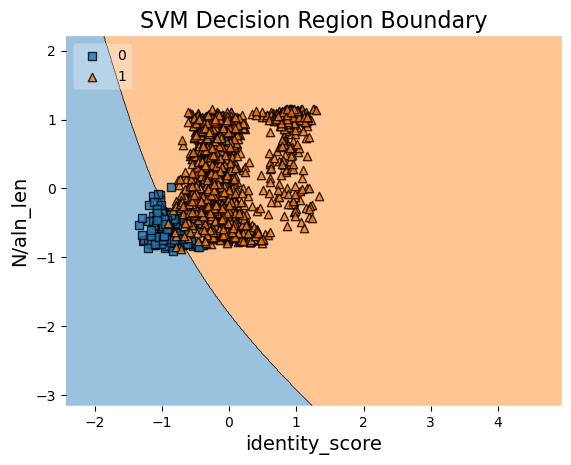

In [109]:
value = np.mean(X_test[:,0])
width = 0.75

# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=X_test, 
                      y=y_test.values,
                      clf=mod,
                      feature_index=[0,2],
                      filler_feature_values={1: value, 3:value, 4:value, 5: value, 6:value, 7:value, 8:value, 9:value, 10:value},
                      filler_feature_ranges={1: width, 3:width, 4:width, 5: width, 6:width, 7:width, 8:width, 9:width, 10:width},
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[2], size=14)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()

gap_ratio, N/aln_len

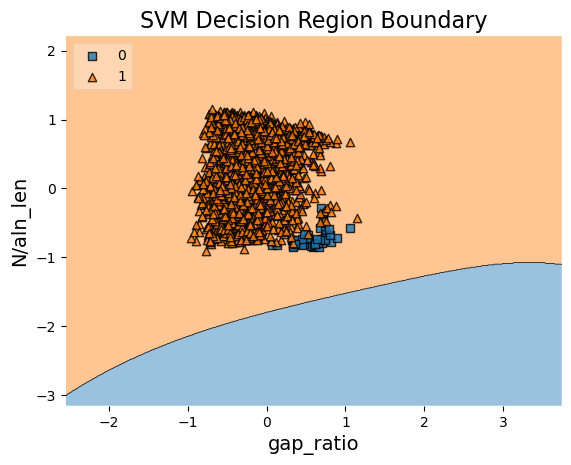

In [110]:
value = np.mean(X_test[:,0])
width = 0.75

# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=X_test, 
                      y=y_test.values,
                      clf=mod,
                      feature_index=[1,2],
                      filler_feature_values={0: value, 3:value, 4:value, 5: value, 6:value, 7:value, 8:value, 9:value, 10:value},
                      filler_feature_ranges={0: width, 3:width, 4:width, 5: width, 6:width, 7:width, 8:width, 9:width, 10:width},
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[1], size=14)
plt.ylabel(X.columns[2], size=14)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()